<a href="https://colab.research.google.com/github/cbsobral/python/blob/master/topic_choices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data

In [ ]:
# install and update packages
!pip install pyLDAvis
!pip install -U gensim

In [ ]:
# import supervision plans from drive
import nltk
from nltk.corpus import PlaintextCorpusReader
url = (r'/content/drive/My Drive/data/')
corpus_list = PlaintextCorpusReader(url, '.*txt')  # Import all files ending in 'txt'

In [ ]:
import nltk
from nltk.corpus import stopwords
import gensim
import pandas as pd
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

wordnet = nltk.WordNetLemmatizer()
stoplist1 = stopwords.words('english')
stoplist = stopwords.words('english')

# list of additional stopwords to be removed
additional_stopwords = """question impact professor school dissertation paper take following http nuffield
                          title school session study work topics project partner practice happy plan see supervise
                          research thesis issue design student topic supervision university lab mia mpp"""  # define additional stopwords in a string

stoplist += additional_stopwords.split()

In [ ]:
# convert token to lowercase and stem using the Porter algorithm
def normalize_token(token):
  return wordnet.lemmatize(token.lower())

# evaluate whether or not to retain `token`
def filter_token(token):
    token = token.lower()
    return token not in stoplist and token.isalpha() and len(token) > 2

In [ ]:
# tokenize and apply functions to files
documents=[[normalize_token(token) 
            for token in corpus_list.words(fileids=[fileid])
            if filter_token(token)]
            for fileid in corpus_list.fileids()]

# create bag of words for each document
dictionary = gensim.corpora.Dictionary(documents)         
documents_bow = [dictionary.doc2bow(document) for document in documents]

## LDA
Latent Dirichlet Allocation Model

### Model

In [ ]:
model = gensim.models.LdaModel(documents_bow, 
                               id2word=dictionary,
                               num_topics=10, # best results with 10 topics
                               random_state=123, # seed for consistency
                               passes=500)

### LDA Vis

In [ ]:
# visualize words per topic
for i, topic in enumerate(model.print_topics(num_topics=10, num_words=7)):
    print (i, ':', topic)

0 : (0, '0.014*"international" + 0.010*"science" + 0.010*"transparency" + 0.007*"organization" + 0.007*"method" + 0.006*"student" + 0.006*"dissertation"')
1 : (1, '0.021*"energy" + 0.018*"electricity" + 0.017*"market" + 0.013*"review" + 0.012*"system" + 0.010*"emission" + 0.009*"generation"')
2 : (2, '0.014*"country" + 0.013*"public" + 0.012*"policy" + 0.012*"medium" + 0.010*"database" + 0.008*"corruption" + 0.008*"ercas"')
3 : (3, '0.016*"public" + 0.016*"policy" + 0.015*"innovation" + 0.013*"lab" + 0.011*"evaluation" + 0.011*"economic" + 0.009*"economics"')
4 : (4, '0.027*"law" + 0.021*"european" + 0.013*"governance" + 0.011*"legal" + 0.011*"policy" + 0.009*"including" + 0.009*"right"')
5 : (5, '0.018*"policy" + 0.016*"political" + 0.014*"analysis" + 0.011*"social" + 0.011*"data" + 0.008*"comparative" + 0.007*"governance"')
6 : (6, '0.025*"health" + 0.011*"data" + 0.010*"social" + 0.008*"http" + 0.007*"inequality" + 0.007*"org" + 0.007*"policy"')
7 : (7, '0.019*"social" + 0.015*"orga

In [ ]:
# create table with top 10 words per topic
n_words = 10
topic_words = pd.DataFrame({})

for i, topic in enumerate(model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

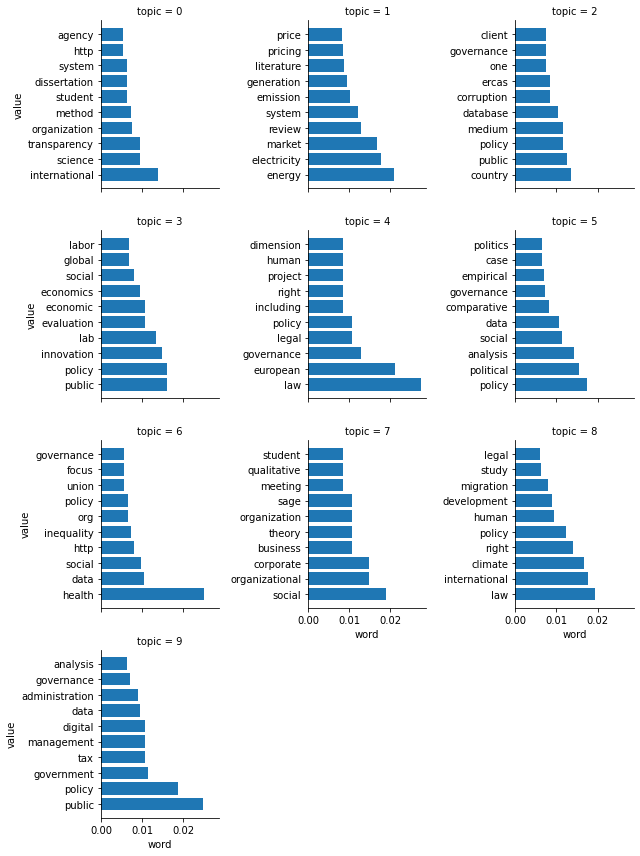

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

# visualize table above
g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

In [ ]:
import pyLDAvis
import pyLDAvis.gensim

# visualize model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, documents_bow, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.047719 -0.055523       1        1  26.145913
9     -0.031767 -0.122022       2        1  19.943590
8     -0.101549  0.161636       3        1  12.581257
6     -0.025539 -0.041619       4        1   9.862240
1      0.226490  0.048692       5        1   8.267061
2     -0.001057 -0.049441       6        1   7.085127
0      0.001506  0.065034       7        1   6.889289
3      0.010311 -0.062997       8        1   4.885952
7      0.001817  0.003602       9        1   2.190055
4     -0.032491  0.052638      10        1   2.149517, topic_info=             Term       Freq       Total Category  logprob  loglift
519           law  32.000000   32.000000  Default  30.0000  30.0000
150        public  80.000000   80.000000  Default  29.0000  29.0000
174        social  56.000000   56.000000  Default  28.0000  28.0000
1311       health  30.000000   30.000000  Default  27.0000  27.0000
487      european  29.000000   29.000000  Default  26.0000  26.0000
...           ...        ...         ...      ...      ...      ...
139        policy   2.263414  129.226370  Topic10  -4.5401  -0.2048
622        europe   0.931974   10.673914  Topic10  -5.4275   1.4017
36    comparative   1.375788   41.935573  Topic10  -5.0380   0.4228
140     political   1.375788   61.282637  Topic10  -5.0380   0.0435
510   institution   0.931974   13.942175  Topic10  -5.4275   1.1346

[696 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
200       5  0.509938            able
200       7  0.339959            able
1842      4  0.877442         academy
202       1  0.202260  accountability
202       2  0.101130  accountability
...     ...       ...             ...
437       2  0.258586            year
437       3  0.129293            year
437       4  0.258586            year
437       7  0.387879            year
1745      3  0.848797             yet

[1248 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 10, 9, 7, 2, 3, 1, 4, 8, 5])

In [ ]:
# topics per document
documents_lda = model[documents_bow]

# variable that identifies file names
file_ids = corpus_list.fileids()

# create table with doc_id and most prevalent topics per document
topic_dt = pd.DataFrame(documents_lda)
doc_dt = pd.DataFrame(file_ids)
conc = pd.concat([doc_dt, topic_dt], axis=1)
conc.columns = ['doc_id', 'topic1', 'topic2', 'topic3']
conc.sort_values(['topic1'], ascending=True, inplace=True)
conc

,doc_id,topic1,topic2,topic3
23,Patz.txt,"(0, 0.97343785)","(9, 0.023631012)",None
1,Bryson.txt,"(0, 0.9978257)",None,None
6,Flachsland.txt,"(1, 0.14514908)","(5, 0.32720935)","(8, 0.525789)"
12,Hirth.txt,"(1, 0.9988156)",None,None
21,MungiuPippidi.txt,"(2, 0.99871033)",None,None
27,Snower.txt,"(3, 0.9949992)",None,None
9,Hallerberg.txt,"(3, 0.9970292)",None,None
5,Dawson.txt,"(4, 0.9957339)",None,None
13,Hustedt.txt,"(5, 0.7501347)","(9, 0.24633978)",None
11,Hassel.txt,"(5, 0.98999697)",None,None


In [ ]:
# documents and topic probability
topics = [model[documents_bow[i]] for i in range(len(documents))]
num_topics = 8

def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

# find documets related to topic i and list top 3
document_topic.sort_values(5, ascending=False)[5].head(3)

### LDA Comparison
Applies LDA model to unseen document -- Students' Master Thesis Projects

In [ ]:
#@title Add Text { run: "auto", vertical-output: true }

yr_text = "health inequality" #@param {type:"string"}



In [ ]:
#@title Add Document
path = "/content/drive/My Drive/docs/stefania.txt" #@param {type:"string"}
yr_p = open(path)
yr_path = yr_p.read()

In [ ]:
# tokenize and create bag of words for unseen document
yr_tokens = nltk.word_tokenize(yr_text)
yr_bow_vector = dictionary.doc2bow(yr_tokens)

In [ ]:
# table with proximity score for top three topics related to unseen doc
results = pd.DataFrame(model[yr_bow_vector])
results.columns = ['topic', 'proximity']
results.sort_values(['proximity'], ascending=False, inplace=True)
print(results.nlargest(3,['proximity']))

   topic  proximity
3      5   0.384443
5      9   0.197332
4      8   0.172438


## TF-IDF
+ 12 topics, 15, 9, 6


### Model

In [ ]:
#!pip install gensim
from gensim import corpora, models

documents_idf = models.TfidfModel(documents_bow)
corpus_tfidf = documents_idf[documents_bow]

model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, 
                                         id2word=dictionary,
                                         num_topics=15, 
                                         random_state=123, 
                                         passes=500)

### TF_IDF Vis

In [ ]:
for idx, topic in model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.000*"postdoctoral" + 0.000*"postwar" + 0.000*"might" + 0.000*"motivate" + 0.000*"observational" + 0.000*"partisan" + 0.000*"persuading" + 0.000*"polish" + 0.000*"populism" + 0.000*"logical"
Topic: 1 Word: 0.003*"corporate" + 0.002*"family" + 0.002*"organizational" + 0.002*"behaviour" + 0.002*"aging" + 0.001*"migration" + 0.001*"identity" + 0.001*"micro" + 0.001*"memory" + 0.001*"demographic"
Topic: 2 Word: 0.003*"sdg" + 0.002*"aid" + 0.002*"indicator" + 0.002*"sdgs" + 0.002*"ercas" + 0.002*"client" + 0.002*"database" + 0.002*"trust" + 0.001*"corruption" + 0.001*"significant"
Topic: 3 Word: 0.005*"public" + 0.004*"management" + 0.004*"medium" + 0.004*"digital" + 0.004*"sector" + 0.004*"climate" + 0.003*"government" + 0.003*"administration" + 0.003*"country" + 0.002*"preference"
Topic: 4 Word: 0.003*"tax" + 0.001*"traffic" + 0.001*"taxation" + 0.001*"crime" + 0.001*"alcohol" + 0.001*"violation" + 0.001*"car" + 0.001*"reporting" + 0.001*"norm" + 0.001*"filing"
Topic: 5 Wo

In [ ]:
n_words = 10

topic_words = pd.DataFrame({})

for i, topic in enumerate(model_tfidf.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

#topic_words.head()

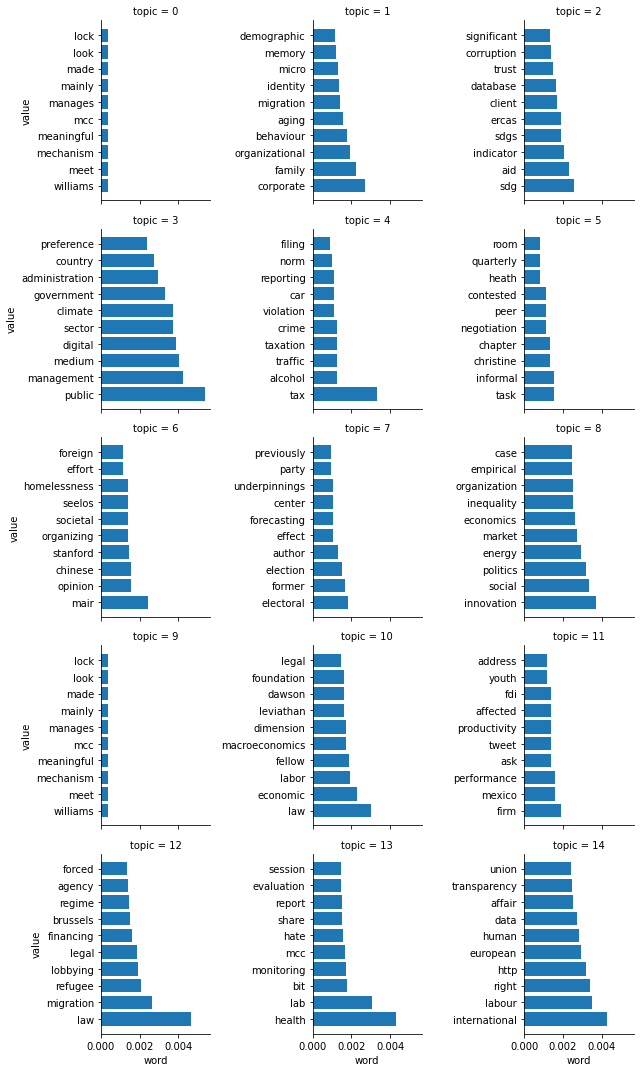

In [ ]:
import seaborn as sns

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

In [ ]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_tfidf, corpus_tfidf, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.051203  0.005139       1        1  23.729966
14     0.028437  0.034902       2        1  20.168540
3      0.018439 -0.039528       3        1  16.847459
13     0.000917  0.000186       4        1   5.712391
12     0.001254  0.000024       5        1   5.167711
2      0.000387 -0.000161       6        1   4.439709
10     0.000679 -0.000230       7        1   3.806057
1      0.000594 -0.000242       8        1   3.761339
6      0.000303 -0.000026       9        1   3.646100
11     0.000555 -0.000297      10        1   3.228077
7      0.000326 -0.000076      11        1   2.856839
5      0.000299 -0.000099      12        1   2.826445
4     -0.000122  0.000066      13        1   2.209094
9     -0.000433  0.000172      14        1   0.800137
0     -0.000433  0.000172      15        1   0.800137, topic_info=               Term     Freq     Total Category  logprob  loglift
519             law  0.00000  0.000000  Default  30.0000  30.0000
150          public  0.00000  0.000000  Default  29.0000  29.0000
1311         health  0.00000  0.000000  Default  28.0000  28.0000
632      management  0.00000  0.000000  Default  27.0000  27.0000
89    international  0.00000  0.000000  Default  26.0000  26.0000
...             ...      ...       ...      ...      ...      ...
915         package  0.00102  0.107453  Topic15  -7.8932   0.1709
914         outlook  0.00102  0.107498  Topic15  -7.8932   0.1705
913          option  0.00102  0.186966  Topic15  -7.8932  -0.3829
912         opinion  0.00102  0.129530  Topic15  -7.8932  -0.0159
911          office  0.00102  0.200509  Topic15  -7.8932  -0.4529

[641 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 15, 4, 14, 13, 3, 11, 2, 7, 12, 8, 6, 5, 10, 1])

In [ ]:
documents_tfidf = model_tfidf[documents_bow]

topic_dt = pd.DataFrame(documents_tfidf)
doc_dt = pd.DataFrame(file_ids)
conc = pd.concat([doc_dt, topic_dt], axis=1)
#conc.columns = ['doc_id', 'topic1', 'topic2']
#conc.sort_values(['topic1'], ascending=True, inplace=True)
conc

,0,0,1,2,3,4,5,6,7
0,Anheier.txt,"(3, 0.0410444)","(8, 0.81407434)","(14, 0.12685463)",None,None,None,None,None
1,Bryson.txt,"(3, 0.12531376)","(8, 0.17230877)","(14, 0.6925131)",None,None,None,None,None
2,Cali.txt,"(2, 0.011016621)","(3, 0.12564714)","(6, 0.023269247)","(8, 0.16420881)","(11, 0.02572023)","(12, 0.23847574)","(13, 0.01874798)","(14, 0.39065552)"
3,Cingolani.txt,"(3, 0.72183836)","(8, 0.17778413)","(14, 0.09530228)",None,None,None,None,None
4,Costello.txt,"(3, 0.116784826)","(8, 0.1674103)","(12, 0.4842068)","(14, 0.21929245)",None,None,None,None
5,Dawson.txt,"(3, 0.07011477)","(8, 0.23953506)","(10, 0.36777556)","(12, 0.021813845)","(14, 0.28944725)",None,None,None
6,Flachsland.txt,"(3, 0.2143607)","(8, 0.3964664)","(13, 0.20306087)","(14, 0.17376749)",None,None,None,None
7,GohdesHW.txt,"(3, 0.103480965)","(8, 0.14116916)","(14, 0.7484956)",None,None,None,None,None
8,Graf.txt,"(3, 0.06964718)","(8, 0.78897)","(14, 0.1387961)",None,None,None,None,None
9,Hallerberg.txt,"(3, 0.3023264)","(8, 0.2930712)","(13, 0.24274665)","(14, 0.15068667)",None,None,None,None


In [ ]:
# table with documents and topic probability
topics = [model_tfidf[documents_bow[i]] for i in range(len(documents))]
num_topics = 9

def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

#document_topic

In [ ]:
document_topic.sort_values(6, ascending=False)[6].head(20)

19    0.270964
28    0.202026
2     0.023268
17    0.012514
0     0.000000
16    0.000000
29    0.000000
27    0.000000
26    0.000000
25    0.000000
24    0.000000
23    0.000000
22    0.000000
21    0.000000
20    0.000000
18    0.000000
15    0.000000
1     0.000000
14    0.000000
13    0.000000
Name: 6, dtype: float64

### TF-IDF Comparison


In [ ]:
#@title Add Document{ run: "auto", vertical-output: true }

yr_research = "Social Policy  Research topic: Family Policy, Health Policy, Education Policy, Social Inequality, Child Outcomes, Poverty 2.\tWhat is your research question?  What are the effects of social inequalities on child outcomes? What are the effects of social inequalities on child development? What are the effects of social inequalities on child well-being? To define the specific question the definition of \"child outcomes\", \"child development\" and child \"well-being\" still need to be defined. 3.\tWhy would you like to explore this topic and question? Please let us know why you are curious about your research topic, and why you think your question(s) are worth exploring. I have always been interested in social policy, especially topics related to Child, Youth, and Family Policies. In the past years, I worked with public education and early childhood development in Brazil. Now, I want to expand my view beyond the education area but still analyze the current situation of marginalized children and teenagers. However, I am still not sure if this will be related to the Brazilian or an International context. " #@param {type:"string"}



In [ ]:
#@title Add Document
path = "/content/drive/My Drive/docs/stefania.txt" #@param {type:"string"}
yr_p = open(path)
yr_path = yr_p.read()

In [ ]:
# pre-process
yr_tokens = nltk.word_tokenize(yr_path)
yr_bow_vector = dictionary.doc2bow(yr_tokens)

In [ ]:
# data frame with results
results = pd.DataFrame(model_tfidf[yr_bow_vector])
results.columns = ['topic', 'proximity']
results.sort_values(['proximity'], ascending=False, inplace=True)
print(results.nlargest(3,['proximity']))

   topic  proximity
3      8   0.331496
7     14   0.286303
2      3   0.148919
